> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [noshowappointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected/downloaded for analysis. Read through the description available on the homepage-links present [here](https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True). List all column names in each table, and their significance. In case of multiple tables, describe the relationship between tables. 


### Question(s) for Analysis


In [3]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as snb
%matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [4]:
# Load data and print out a few lines. Perform operations to inspect data
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
#want to see how big the data is 
df.shape

(110527, 14)

In [6]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
110497    False
110498    False
110499    False
110500    False
110501    False
110502    False
110503    False
110504    False
110505    False
110506    False
110507    False
110508    False
110509    False
110510    False
110511    False
110512    False
110513    False
110514    False
110515    False
110516    False
110517    False
110518    False
110519    False
110520    False
110521    False
110522    False
110523    False
110524    False
110525    False
110526    False
Length: 110527, dtype: b

In [7]:
#wanted to make sure there is no duplication 
df.duplicated().sum()

0

In [8]:
#look for more info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [9]:
#some statistics 
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [10]:
#Want to know the frequency of this error in the data set 
#since it is one row so it will not affect the results
deror = df.query('Age == "-1" ')
deror

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [11]:
#how many duplicates for the same patients 
df['PatientId'].duplicated().sum()

48228

In [11]:
#concerned with the presence or abscence 
df.duplicated(['PatientId', 'No-show']).sum()

38710


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [4]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.bb


I found a duplicates in the status of no show correlated to the ID number 
so i have to remove it to move forward with data

In [12]:
df.drop_duplicates(['PatientId', 'No-show'], inplace =True)

In [13]:
df.shape

(71817, 14)

Then I will drop the columens that i don't need in my analysis

In [14]:
df.drop(['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay'], axis=1, inplace=True)

In [15]:
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1 (What factor influences the abscence of patients)

In [5]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


In [15]:
df.rename(columns = {'No-show':'No_show'}, inplace = True)

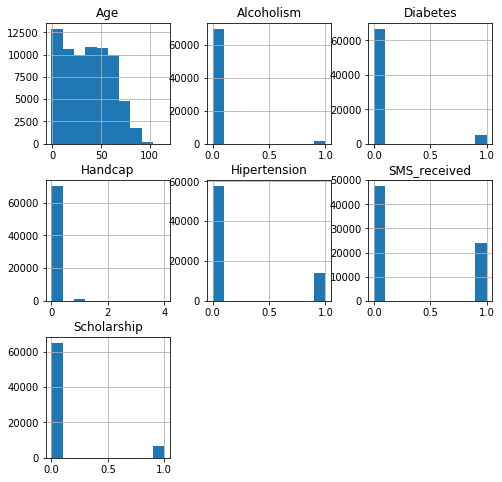

In [16]:
df.hist(figsize=(8,8));

In [17]:
exist = df.No_show =='No'
not_exist = df.No_show =='Yes'
df[exist].count().mean(),df[not_exist].count().mean()

(54154.0, 17663.0)

want to seem more insights 

In [18]:
df[exist].mean(),df[not_exist].mean()

(Age             37.228460
 Scholarship      0.091332
 Hipertension     0.202940
 Diabetes         0.072866
 Alcoholism       0.023599
 Handcap          0.020903
 SMS_received     0.297226
 dtype: float64, Age             34.376267
 Scholarship      0.108419
 Hipertension     0.170922
 Diabetes         0.065108
 Alcoholism       0.029440
 Handcap          0.017777
 SMS_received     0.453094
 dtype: float64)

The patients that didn't attend received more sms than who came to their visits (Something went wrong with sms campgain)

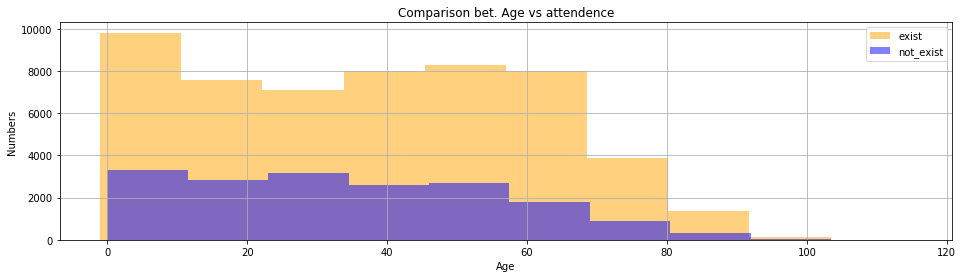

In [19]:
#creating a function to proprly use python skills besides it will make the rest of analysis more easy.
def Age_investigation (df,col_name, exist, not_exist):
    
    plt.figure(figsize = [16,4])
    df[col_name][exist].hist(alpha=.5, bins=10, color='orange', label='exist');
    df[col_name][not_exist].hist(alpha=.5, bins=10, color='blue', label='not_exist');
    plt.legend();
    plt.title('Comparison bet. Age vs attendence')
    plt.xlabel('Age')
    plt.ylabel('Numbers');
Age_investigation (df, 'Age', exist, not_exist)    
    



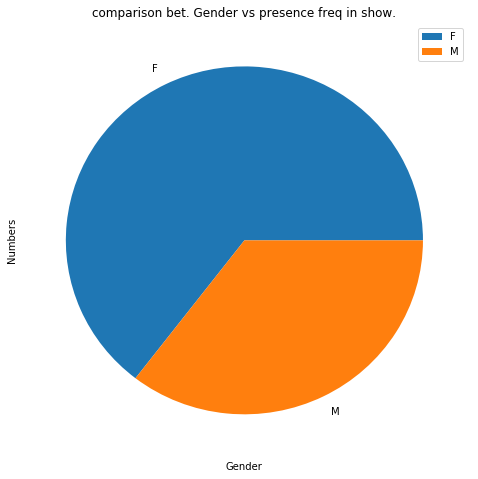

In [33]:
def Age_investigation (df,col_name, exist, not_exist):
    
    plt.figure(figsize = [8,8])
    df[col_name][exist].value_counts(normalize=True).plot(kind='pie', label='exist')
    plt.legend();
    plt.title('comparison bet. Gender vs presence freq in show.')
    plt.xlabel('Gender')
    plt.ylabel('Numbers');
Age_investigation (df, 'Gender', exist, not_exist) 

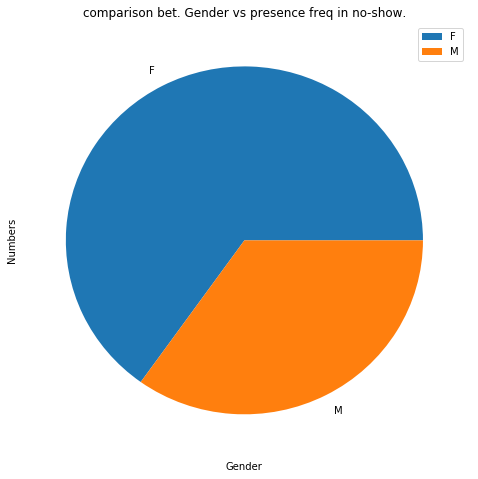

In [31]:
#Make this with 'pie' visulization makes it more readable
def Age_investigation (df,col_name, exist, not_exist):
    
    plt.figure(figsize = [8,8])
    df[col_name][not_exist].value_counts(normalize=True).plot(kind='pie', label='not_exist')
    plt.legend();
    plt.title('comparison bet. Gender vs presence freq in no-show.')
    plt.xlabel('Gender')
    plt.ylabel('Numbers');
Age_investigation (df, 'Gender', exist, not_exist) 

In [32]:
I was trying to find any correlation betwwen presence and gender but it seems indifferent 

SyntaxError: invalid syntax (<ipython-input-32-df1242568526>, line 1)

In [23]:
df[exist].groupby(['Hipertension', 'Diabetes']).mean()['Age'],df[not_exist].groupby(['Hipertension', 'Diabetes']).mean()['Age']

(Hipertension  Diabetes
 0             0           30.712613
               1           53.701370
 1             0           60.270517
               1           63.764303
 Name: Age, dtype: float64, Hipertension  Diabetes
 0             0           28.768691
               1           49.481172
 1             0           58.650380
               1           62.913282
 Name: Age, dtype: float64)

There is no significant correlation between the cronic diseases and age 

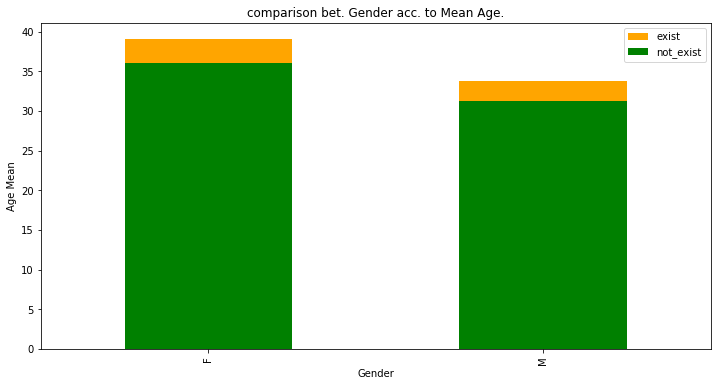

In [27]:
#does Age and gender affect the presence?
plt.figure(figsize = [12,6])
df[exist].groupby('Gender').Age.mean().plot(kind='bar', color='orange', label='exist')
df[not_exist].groupby('Gender').Age.mean().plot(kind='bar', color='green', label='not_exist')
plt.title('comparison bet. Gender acc. to Mean Age.')
plt.legend();
plt.xlabel('Gender')
plt.ylabel('Age Mean');

There is no sigificant effect of the mean age of specific gender in abscence

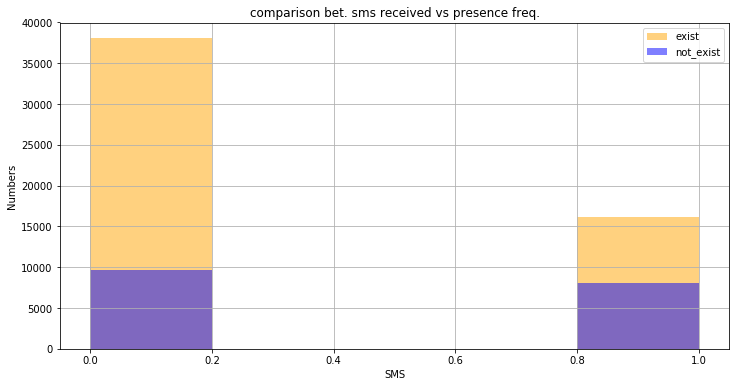

In [26]:
def Age_investigation (df,col_name, exist, not_exist):
    plt.figure(figsize = [12,6])
    df[col_name][exist].hist(alpha=.5, bins=5, color='orange', label='exist');
    df[col_name][not_exist].hist(alpha=.5, bins=5, color='blue', label='not_exist');
    plt.legend();
    plt.title('comparison bet. sms received vs presence freq.')
    plt.xlabel('SMS')
    plt.ylabel('Numbers');
Age_investigation (df, 'SMS_received', exist, not_exist) 

The number of presence of patients who didn't receive a confirmation massage is greater then who did

is there any correlation between neighberhood and attendence ?

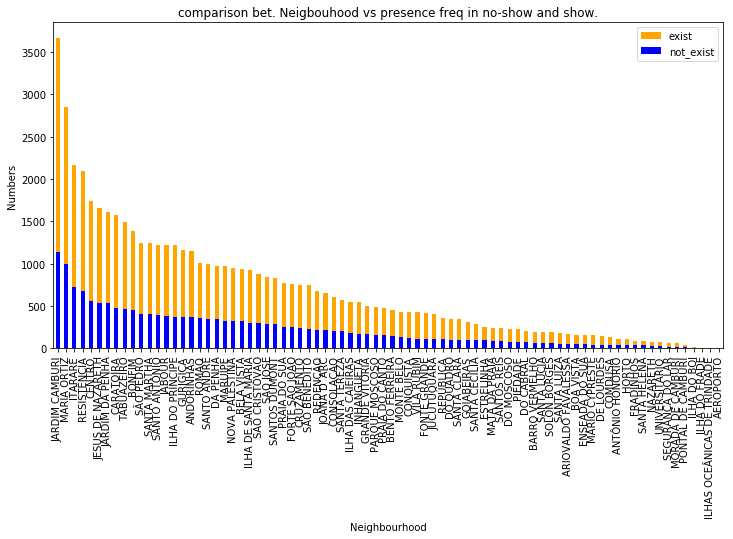

In [35]:
plt.figure(figsize = [12,6])
df.Neighbourhood[exist].value_counts().plot(kind='bar', color='orange', label='exist')
df.Neighbourhood[not_exist].value_counts().plot(kind='bar', color='blue', label='not_exist')
plt.legend();
plt.title('comparison bet. Neigbouhood vs presence freq in no-show and show.')
plt.xlabel('Neighbourhood')
plt.ylabel('Numbers');

### Research Question 2  (Replace this header name!)

In [6]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> There is a significant eefect of SMS confirmation massage on the presence of patients.
We need to revisit the SMS Campgain to Check its reability.

> There is also a significant correlation between the neigbourhood and the attendence 

Limitations:
There was no correlation between chronic diseases concerned with age and the presence of patients.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [36]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0